In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import data
data = pd.read_csv('./data/metro-bike-share-trip-data.csv')

C:\Users\grant\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04..."


In [7]:
# extract month from characters 5:7
# extract hour from -8:-6
# round based on -5:-3
def add_time_var(df):
    df = df.copy()
    hour_data = []
    month_data = []
    
    # calculates time of entry to the nearest hour
    for i, row in df.iterrows():
        hour = int(row['Start Time'][-8:-6])
        minutes = int(row['Start Time'][-5:-3])
        if minutes > 30:
            hour = hour + 1
        if hour == 24: 
            hour = 0
        hour_data.append(hour)
        
        month = row['Start Time'][5:7]
        # converts the month variable into int
        if month[-2] == '0': month = month[-1]
        month_data.append(int(month))
        
    df['Month'] = pd.Series(month_data)
    df['Time_of_Day'] = pd.Series(hour_data)
    return df

In [8]:
df = add_time_var(data)

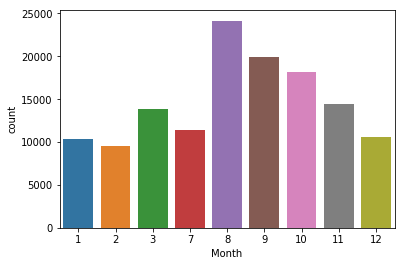

In [9]:
sns.countplot(data=df, x='Month')

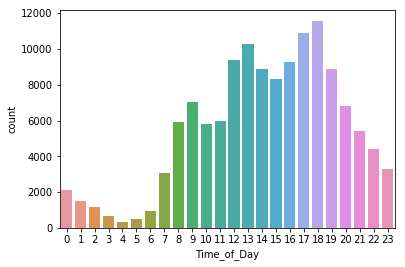

In [10]:
sns.countplot(data=df, x='Time_of_Day')

C:\Users\grant\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


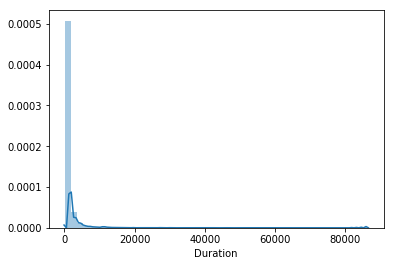

In [11]:
sns.distplot(data['Duration'])

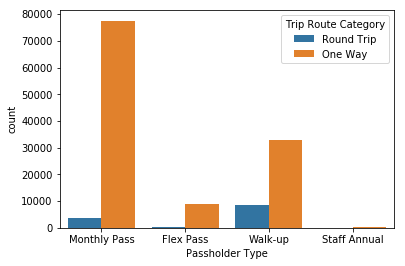

In [12]:
sns.countplot(data=df, x='Passholder Type', hue='Trip Route Category')

In [15]:
data['Passholder Type'].unique()

array(['Monthly Pass', 'Flex Pass', 'Walk-up', 'Staff Annual'],
      dtype=object)

In [17]:
data.groupby('Passholder Type').agg('count')

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Starting Lat-Long,Ending Lat-Long
Passholder Type,,,,,,,,,,,,,,,
Flex Pass,9517,9517,9517,9517,9514,9510,9510,9517,9464,9464,9517,9517,9517,7222,9464
Monthly Pass,81304,81304,81304,81304,81291,81266,81266,81291,80855,80855,81300,80920,81304,60284,80855
Staff Annual,382,382,382,382,379,379,379,326,314,314,378,0,382,379,314
Walk-up,41224,41224,41224,41224,41224,41224,41224,41197,40743,40743,41222,41224,41224,30737,40743


In [19]:
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print(geopy.distance.vincenty(coords_1, coords_2).km)

279.35290160386563


In [21]:
coords_vars = ['Starting Station Latitude', 'Starting Station Longitude', 'Ending Station Latitude', 'Ending Station Longitude']

In [24]:
coords_df = data[coords_vars].dropna()

In [30]:
sum_dist = 0
for index, row in coords_df.iterrows():
    coords_1 = (row['Starting Station Latitude'], row['Starting Station Longitude'])
    coords_2 = (row['Ending Station Latitude'], row['Starting Station Longitude'])
    temp_dist = geopy.distance.vincenty(coords_1, coords_2).km
    sum_dist = sum_dist + temp_dist
print(sum_dist / (len(coords_df.index) + 0.0))

1.7620561299123143
